In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%matplotlib inline

### Let's Start Plotting

In [ ]:
url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")

df = pd.read_csv(url)

In [ ]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


- "Median" is the median earnings of full-time, year-round workers.
- "P25th" is the 25th percentile of earnings.
- "P75th" is the 75th percentile of earnings.
- "Rank" is the major’s rank by median earnings.

Let's say I want to plot the earnings vs the Rank:

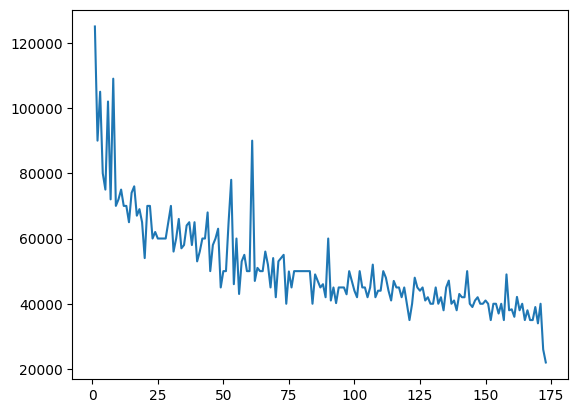

In [ ]:
# I can do this easily with matplotlib

plt.plot(df["Rank"], df["P75th"])

<Axes: xlabel='Rank'>

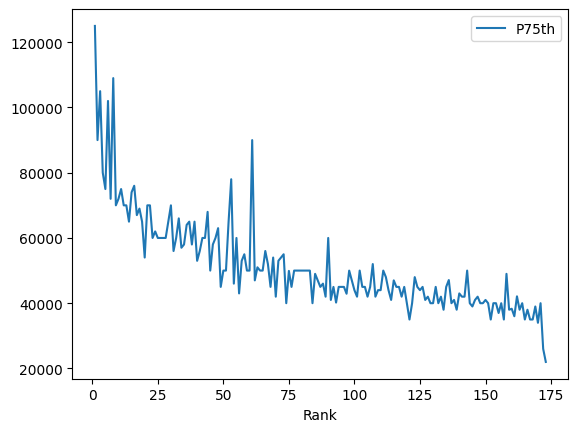

In [ ]:
#But Pandas lets me do this too, by providing a wrapper for matplotlib in the plot() method
df.plot(x="Rank", y="P75th")

<Axes: xlabel='Rank'>

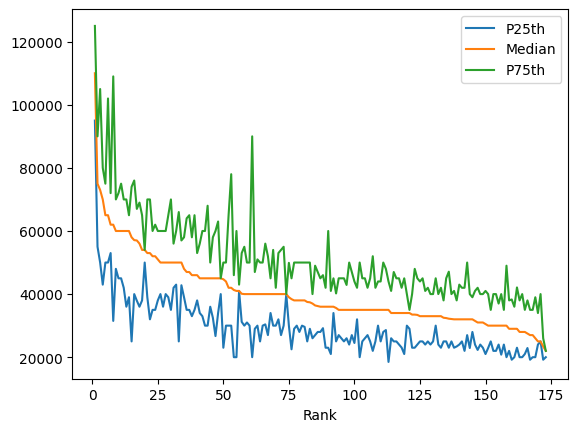

In [ ]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

The ``kind`` parameter accepts eleven different string values and determines which kind of plot you'll create. The default value is ``line``.

- **"area"** is for area plots.
- **"bar"** is for vertical bar charts.
- **"barh"** is for horizontal bar charts.
- **"box"** is for box plots.
- **"hexbin"** is for hexbin plots.
- **"hist"** is for histograms.
- **"kde"** is for kernel density estimate charts.
- **"density"** is an alias for "kde".
- **"line"** is for line graphs.
- **"pie"** is for pie charts.
- **"scatter"** is for scatter plots.

<Axes: ylabel='Density'>

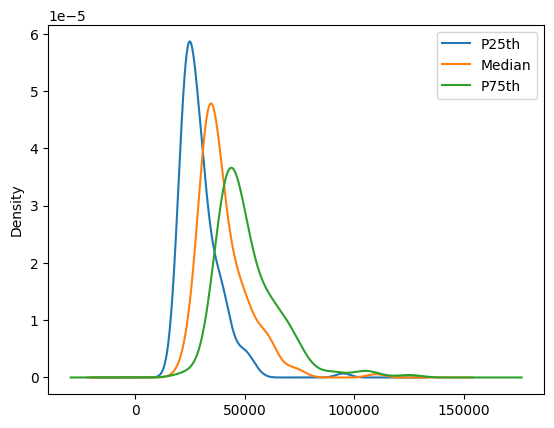

In [ ]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"], kind = "kde")

## Distributions and Histograms

``DataFrame`` is not the only class in pandas with a ``.plot()`` method.

The ``Series`` object provides similar functionality.

In [ ]:
# And as it so happens, the column of dataframe is a series

median_column = df["Median"]

type(median_column)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

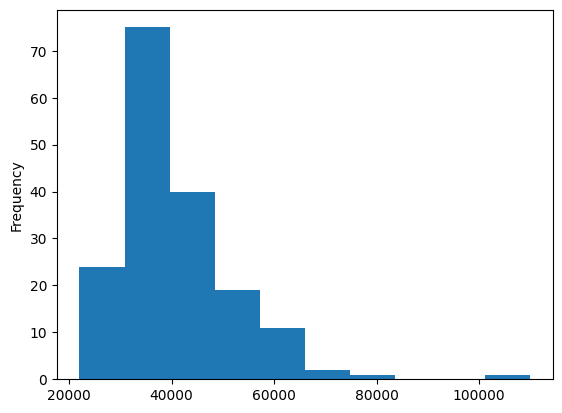

In [ ]:
median_column.plot(kind="hist")

### Let's use a Bar tool to find out what's going with that really tiny group that's making six figures!


In [ ]:
# First let's create a dataframe made of the top 5 careers

top_5 = df.sort_values(by="Median", ascending=False).head()

<Axes: xlabel='Major'>

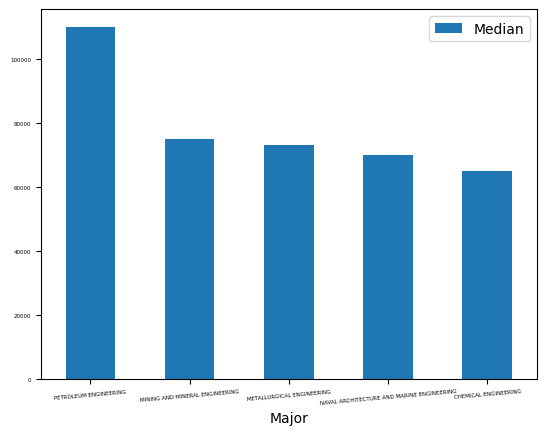

In [ ]:
# Now we plot

top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

Let's investigate all majors whose median salary is above $60,000. First, you need to filter these majors with ``` df[df["Median"] > 60000]```. Then you can create another bar plot showing all three earnings columns:



<Axes: xlabel='Major'>

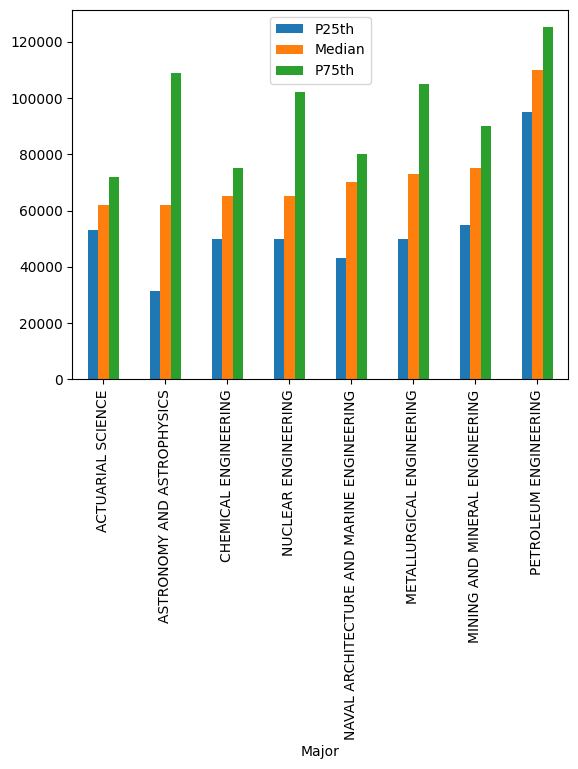

In [ ]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

## Checking for Correlation with Scatterplots

If you pick a major with higher median earnings, do you also have a lower chance of unemployment?

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

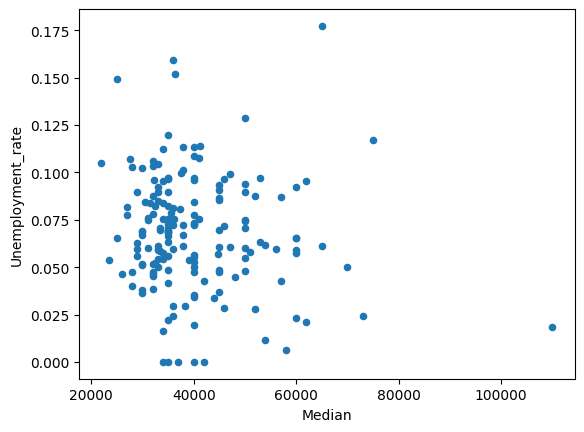

In [ ]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")